In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import warnings

#Ignore the warnings
warnings.filterwarnings('ignore')

#Load prject's data
data_climate = pd.read_csv('data_fortaleza-CE.csv')
data_climate.columns = ['codigo_estacao','data','hora','temp_inst','temp_max','temp_min','umid_inst','umid_max','umid_min','pto_orvalho_inst','pto_orvalho_max','pto_orvalho_min','pressao','pressao_max','pressao_min','vento_direcao','vento_vel','vento_rajada','radiacao','precipitacao']

#Adding parameters no much correlactinated
data_for_knn = pd.DataFrame(data_climate[['hora','temp_inst','umid_inst','pto_orvalho_inst','pressao','vento_rajada','vento_direcao','vento_vel']])
data_for_knn.head()


,hora,temp_inst,umid_inst,pto_orvalho_inst,pressao,vento_rajada,vento_direcao,vento_vel
0,13,30.4,67,23.5,1009.7,7.6,2.9,140
1,11,28.4,76,23.7,1009.6,NaN,2.3,152
2,14,30.9,58,21.7,1009.1,8.3,3.0,139
3,12,29.0,72,23.5,1010.0,6.7,2.8,137
4,15,32.1,55,22.1,1008.3,8.2,2.8,148


#       USING KNN ALGORITHM(CLASSIFICATION)

In [2]:
# Divide the train,test and validation data
len_validation = len(data_for_knn)

set_validation = data_for_knn[:381]
set_test_train = data_for_knn[381:]

x = set_test_train[['vento_rajada','vento_direcao']]
y = set_test_train[['vento_vel']]
x_validation = set_validation[['vento_rajada','vento_direcao']]
y_validation = set_validation[['vento_vel']]

In [3]:
#The KNN algorthim fuctino;
# - Divide train and test data
# - Create a model(with train data)
# - Test the model(with test data)
# - get score with accuracy_score function's sklearn
# - get RMSE with math's function
# - Return acc,rmse,data predicts and output data test
def knn_test(x,y):
  
    train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,
                                                shuffle=False)
    knn = KNeighborsClassifier(n_neighbors = 100)
    knn.fit(train_x,train_y)
    predicts = knn.predict(test_x)
    
    acc = accuracy_score(test_y,predicts)
    rmse = math.sqrt(mean_squared_error(test_y, predicts))
    
    return acc,rmse,predicts,test_y


In [4]:
#Using the knn_test function for get results
acc = knn_test(x,y)[0]
rmse = knn_test(x,y)[1]

print('Melhor acurácia -> {}%'.format(acc*100))
print('Melhor RMSE     -> {}'.format(rmse))  

Melhor acurácia -> 1.639344262295082%
Melhor RMSE     -> 36.32368147731688


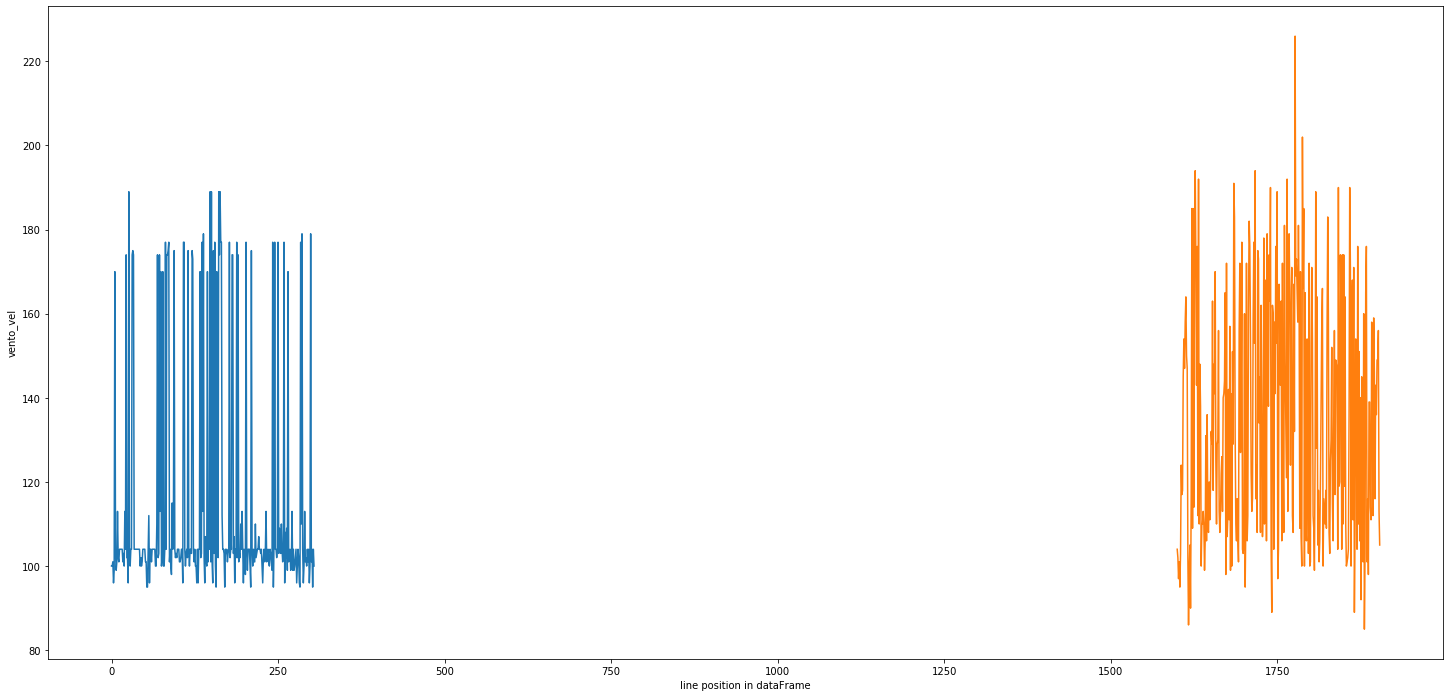

In [5]:
#Plot both
plt.rcParams['figure.figsize'] = (25,12)
plt.plot(knn_test(x,y)[2])
plt.plot(knn_test(x,y)[3])
plt.xlabel('line position in dataFrame')
plt.ylabel('vento_vel')
plt.show()

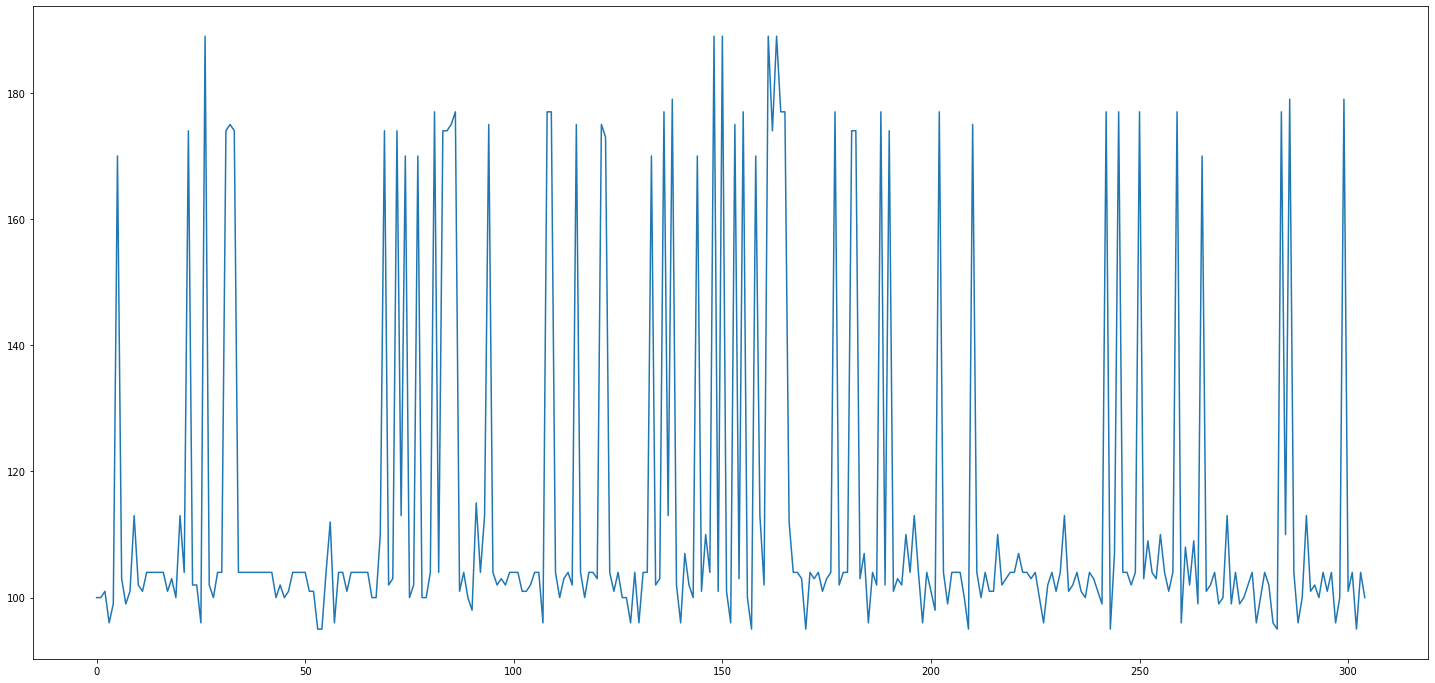

In [6]:
#Predicted's data
plt.plot(knn_test(x,y)[2])

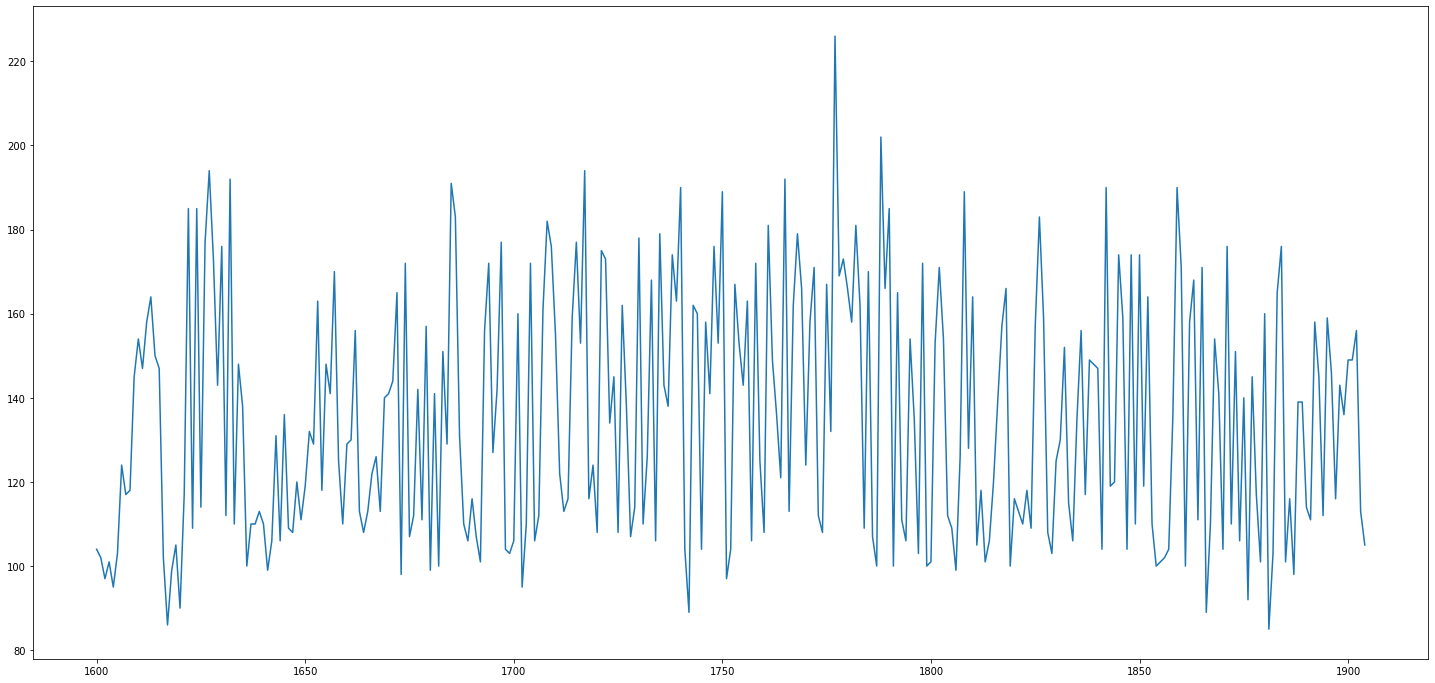

In [7]:
#Real's data
plt.plot(knn_test(x,y)[3])